In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import PunktSentenceTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
english_stopwords = stopwords.words('english')

def remove_stopwords(tokens):
    return [word for word in tokens if word.lower() not in english_stopwords]

# Домашнє завдання: Побудова класифікатора сентименту на основі набору даних Tweet Sentiment Extraction

**Мета:** Провести аналіз набору даних, виконати векторизацію текстових даних за допомогою методів bag-of-words та TF-IDF, порівняти їх, побудувати класифікатор та провести аналіз помилок.

**Набір даних:**
Дані беремо з цього змагання на Kaggle: https://www.kaggle.com/competitions/tweet-sentiment-extraction/data?select=train.csv

Оригінальне змагання має дещо іншу задачу, але ми будемо поки будувати саме класифікатор.

### Завдання 1. Завантаження та ознайомлення з набором даних

- Завантажте набір даних `train.csv` з посилання та ознайомтеся з його структурою.
- Виведіть перші 5 рядків та основну статистику: кількість записів, типи колонок, кількість пропущених значень.
- Видаліть записи, в яких є пропущені значення.



In [77]:
train_df

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27475,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27476,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27477,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27478,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [76]:
train_df = pd.read_csv("./train-2.csv")

display(train_df.head())

display(train_df.describe())

display(train_df.dtypes)

display(train_df[train_df.isna().any(axis=1)])

train_df = train_df.dropna()
display(train_df.isna().any())

train_df = train_df.reset_index()

train_df = train_df.drop(columns=["index"])


,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


,textID,text,selected_text,sentiment
count,27481,27480,27480,27481
unique,27481,27480,22463,3
top,6f7127d9d7,All this flirting going on - The ATG smiles...,good,neutral
freq,1,1,199,11118


,0
textID,object
text,object
selected_text,object
sentiment,object


,textID,text,selected_text,sentiment
314,fdb77c3752,NaN,NaN,neutral


,0
textID,False
text,False
selected_text,False
sentiment,False



### Завдання 2. Exploratory Data Analysis

- Проведіть аналіз кількості класів та розподілу міток. Класи знаходяться в колонці `sentiment`.
- Візуалізуйте розподіл довжин текстів в символах та зробіть висновок про довжини постів: якої довжини постів найбільше, що бачите з розподілу?



array(['neutral', 'negative', 'positive'], dtype=object)

,proportion
sentiment,
neutral,40.454876
positive,31.229985
negative,28.315138


Description of charachters amount in DF


,text
count,27480.000000
mean,68.330022
std,35.603870
min,3.000000
25%,39.000000
50%,64.000000
75%,97.000000
max,141.000000


Description of words/symbols amount in DF


,text
count,27480.000000
mean,13.779913
std,7.169690
min,1.000000
25%,8.000000
50%,13.000000
75%,19.000000
max,101.000000


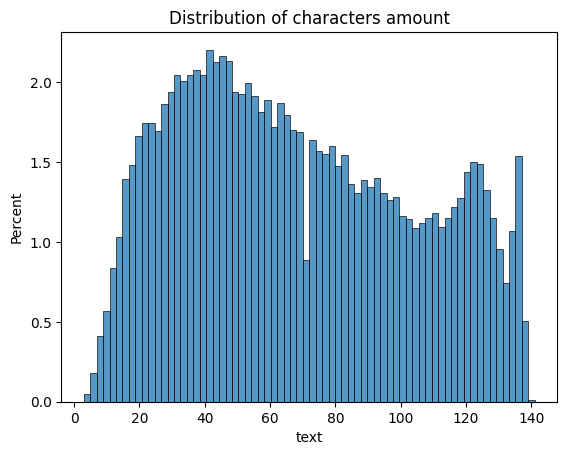

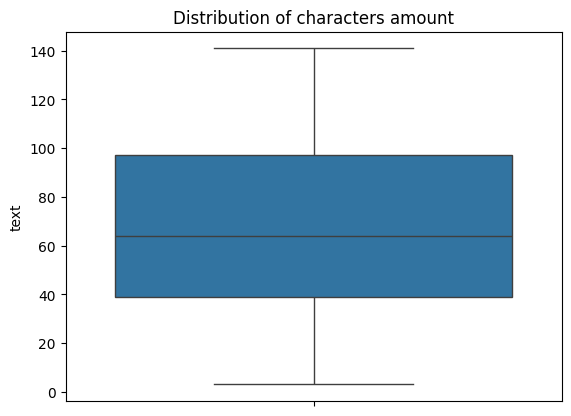

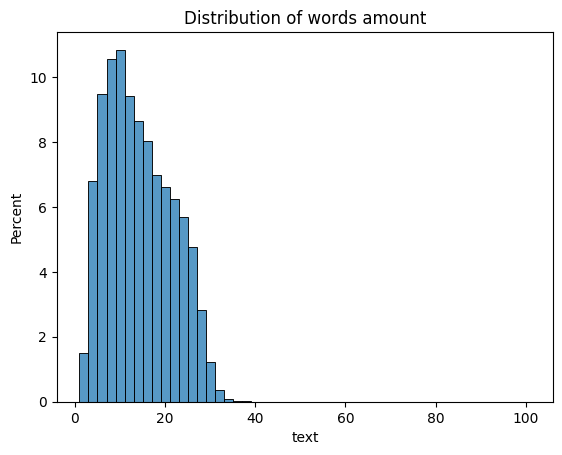

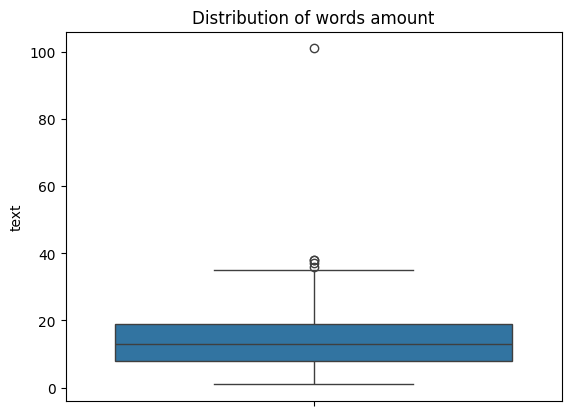

In [78]:
display(train_df["sentiment"].unique())

display(train_df["sentiment"].value_counts(normalize=True) * 100)

print("Description of charachters amount in DF")
display(train_df["text"].str.len().describe())
print("Description of words/symbols amount in DF")
display(train_df["text"].str.split(" ").apply(len).describe())

plt.title("Distribution of characters amount")
sns.histplot(train_df["text"].str.len(), stat="percent", bins=70)
plt.show()

plt.title("Distribution of characters amount")
sns.boxplot(train_df["text"].str.len())
plt.show()

plt.title("Distribution of words amount")
sns.histplot(train_df["text"].str.split(" ").apply(len), stat="percent",  bins=50)
plt.show()

plt.title("Distribution of words amount")
sns.boxplot(train_df["text"].str.split(" ").apply(len))
plt.show()

Here we can clearly see that charachters distribution lays between 3 - 140, but 50% we find in 40-100 interval. The distribution form is kind of bellcurve, with flat tendency. In the case of words amount distibution it is more like a skewed bellcurve.

### Завдання 3. Попередня обробка текстових даних та векторизація з bag of words


Наша задача тут отримати вектори методом bag of words колонки `text`, виконавши попередню обробку тексту.
Попередня обробка має включати
- видалення stopwords необхідної мови
- токенізація (розбиття текстів на фрагменти по 1 слову)
- стеммінг слів зі `SnowballStemmer`.
- самостійно задайте кількість слів в словнику для `sklearn.feature_extraction.text.CountVectorizer`. Можливо для цього доведеться виконати додатковий аналіз.

Ви також можете додати сюди додаткові методи очистки текстів, наприклад, видалення деяких символів чи груп символів, якщо в процесі роботи побачите, що хочете щось видалити.

Напишіть код аби виконати це завдання. Перед цим рекомендую детально ознайомитись з тим, що робить обʼєкт `sklearn.feature_extraction.text.CountVectorizer` за замовченням.

Це завдання можна виконати двома способами - один - максимально подібно до того, як ми це робили в лекції, другий - дещо інакше перегрупувавши етапи обробки тексту.




In [79]:
sent_detector = PunktSentenceTokenizer()
stemmer = SnowballStemmer(language='english')

train_df["tokens"] = train_df["text"].apply(lambda x: word_tokenize(x))
train_df["tokens"] = train_df["tokens"].apply(lambda x: remove_stopwords(x))
train_df["tokens"] = train_df["tokens"].apply(lambda x: [stemmer.stem(word) for word in x])

train_df["tokens_text"] = train_df["tokens"].apply(lambda x: " ".join(x))

In [80]:
raw_vect = CountVectorizer()

raw_vect_fit = raw_vect.fit(train_df["tokens_text"])

len(raw_vect_fit.get_feature_names_out())

21748

In [81]:
vectorizer = CountVectorizer(lowercase=True,
                             tokenizer=word_tokenize,
                             stop_words=english_stopwords,
                             max_features=5000)

In [82]:
%%time
vectorizer.fit(train_df["text"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


CPU times: user 7.24 s, sys: 26.1 ms, total: 7.26 s
Wall time: 10.6 s


CountVectorizer(max_features=5000,
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x7a4d52fdcdc0>)

In [83]:
vectorizer.get_feature_names_out()[1000:1020]

array(['clothes', 'cloud', 'clouds', 'cloudy', 'club', 'clubbing', 'clue',
       'cn', 'cnn', 'cnt', 'co', 'coach', 'coast', 'coat', 'cobra',
       'cocktail', 'cocktails', 'code', 'coding', 'coffee'], dtype=object)

In [84]:
vectors = vectorizer.transform(train_df["text"])

### Завдання 4. Побудова класифікатора

- Розділіть індекси даних на навчальний та тестовий набори в обраному співвівдношенні. Використовуючи отримані індекси сфомуйте набори для тренування класифікатора `X_train_bow, X_test_bow, y_train, y_test`.
- Навчіть класифікатор (наприклад, Logistic Regression, Decision Tree або один з алгоритмів бустингу) на даних, векторизованих методом bag-of-words. Спробуйте кілька моделей і оберіть найбільш точну :)
- Виведіть інформацію, яка дає можливість оцінити якість класифікації.
- Оцініть якість фінальної класифікації: вона хороша чи не дуже?



In [85]:
from sklearn.model_selection import train_test_split

X_train_bow, X_test_bow, y_train, y_test = train_test_split(
    vectorizer.transform(train_df["text"]),
    train_df["sentiment"],
    test_size=0.2,
    random_state=42
)

def encode_sentiment(sentiment):
    if sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    else:
        return 0

y_train = y_train.apply(encode_sentiment)
y_test = y_test.apply(encode_sentiment)

In [86]:
import xgboost as xgb

# Create regression matrices
dtrain_reg = xgb.DMatrix(X_train_bow, y_train)
dtest_reg = xgb.DMatrix(X_test_bow, y_test)

In [87]:
# Define hyperparameters
params = {"objective": "multi:softmax", "num_class": 3,"device": "cuda"}

n = 500
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

In [88]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(dtest_reg)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 70.98%
              precision    recall  f1-score   support

           0       0.74      0.59      0.66      1572
           1       0.66      0.77      0.71      2236
           2       0.77      0.74      0.75      1688

    accuracy                           0.71      5496
   macro avg       0.72      0.70      0.71      5496
weighted avg       0.72      0.71      0.71      5496



In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
}

grid_search = GridSearchCV(xgb.XGBClassifier(objective='multi:softmax', num_class=3),
                           param_grid, cv=3, verbose=3, n_jobs=-1)
grid_search.fit(X_train_bow, y_train)

# Best hyperparameters
print(grid_search.best_params_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
{'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}


In [89]:
# Define hyperparameters
params = {"objective": "multi:softmax", "num_class": 3,"device": "cuda", 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300}

n = 1500
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:32:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


In [90]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(dtest_reg)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred))


Accuracy: 70.54%
              precision    recall  f1-score   support

           0       0.71      0.61      0.66      1572
           1       0.66      0.75      0.70      2236
           2       0.77      0.74      0.75      1688

    accuracy                           0.71      5496
   macro avg       0.71      0.70      0.70      5496
weighted avg       0.71      0.71      0.70      5496



### Завдання 5. Аналіз впливовості слів в отриманого класифікатора

- Для обраної вами моделі проведіть аналіз важливості слів (ознак): які слова (токени) найбільше впливають для визначення сентименту? Чи це логічно на ваш погляд, що саме ці символи впливають найбільше/найменще?


In [91]:
importance_weight = model.get_score(importance_type='weight')
importance_gain = model.get_score(importance_type='gain')
importance_cover = model.get_score(importance_type='cover')

print("Feature importance by weight:", importance_weight)
print("Feature importance by gain:", importance_gain)
print("Feature importance by cover:", importance_cover)

#we will use gain in this case

sorted_importance_gain = sorted(importance_gain.items(), key=lambda x: x[1], reverse=True)

# Get the top 10 most important features
top_10_features = sorted_importance_gain[:10]
print("Top 10 features by gain:", top_10_features)

feature_names = [i[0] for i in top_10_features]
feature_names = [name[1:] for name in feature_names]
feature_names = [int(name) for name in feature_names]

print(vectorizer.get_feature_names_out()[feature_names])

Feature importance by weight: {'f0': 4289.0, 'f1': 112.0, 'f2': 27.0, 'f4': 139.0, 'f5': 120.0, 'f6': 3.0, 'f7': 4.0, 'f12': 19.0, 'f18': 118.0, 'f19': 127.0, 'f20': 467.0, 'f21': 19.0, 'f22': 3396.0, 'f23': 226.0, 'f24': 4.0, 'f27': 4.0, 'f30': 5524.0, 'f31': 500.0, 'f32': 1649.0, 'f33': 107.0, 'f34': 17.0, 'f35': 3.0, 'f36': 13.0, 'f37': 5.0, 'f40': 13.0, 'f42': 1.0, 'f43': 8.0, 'f44': 2.0, 'f46': 21.0, 'f49': 6.0, 'f50': 1.0, 'f53': 8.0, 'f59': 4.0, 'f61': 11.0, 'f62': 2.0, 'f65': 7.0, 'f66': 7.0, 'f67': 14.0, 'f72': 2.0, 'f77': 150.0, 'f79': 2.0, 'f85': 5.0, 'f87': 3.0, 'f93': 1.0, 'f94': 6.0, 'f101': 9.0, 'f102': 11.0, 'f103': 8.0, 'f107': 85.0, 'f109': 15.0, 'f111': 8.0, 'f116': 1.0, 'f117': 4.0, 'f119': 13.0, 'f124': 2.0, 'f125': 8.0, 'f126': 17.0, 'f128': 39.0, 'f130': 2.0, 'f131': 4.0, 'f132': 10.0, 'f134': 29.0, 'f137': 22.0, 'f138': 2.0, 'f139': 7.0, 'f140': 10.0, 'f142': 4.0, 'f144': 8.0, 'f145': 11.0, 'f146': 1.0, 'f147': 12.0, 'f148': 12.0, 'f150': 10.0, 'f152': 16.0, 'f1

### Завдання 6. Векторизація текстів з допомогою TF-IDF. Тренування класифікатора, аналіз точності і впливовості слів.

- Проведіть векторизацію текстів з векторизатором TfidfVectorizer. Реалізуйте векторизацію так, аби препроцесинг включав всі ті самі кроки, що і в випадку використання векторизації Bag of Words.

- Натренуйте той самий класифікатор на TF-IDF векторах, виконавши розбивку набору даних на train, test так, аби в трейні були всі ті самі записи, що і були в попередньому завданні (це важливо для порівняння результатів).

- Проаналізуйте якість класифікації вивівши потрібні для цього метрики. Чи стала якість класифікації кращою?

- Які токени найбільше впливають на результат при тренуваннні класифікатора з TF-IDF векторами? Порівняйте з найважливішими токенами при Bag of Words векторизації. Яку векторизацію ви б обрали для фінальної імплементації рішення? Обґрунтуйте свій вибір.



In [92]:
tfid_vectorizer = TfidfVectorizer(lowercase=True,
                             tokenizer=word_tokenize,
                             stop_words=english_stopwords,
                             max_features=5000)

tfid_vectorizer.fit(train_df["text"])

tfid_vectors = tfid_vectorizer.transform(train_df["text"])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn(


In [93]:
train_indexes = y_train.index
test_indexes = y_test.index

X_train_tfid = tfid_vectors[train_indexes]
X_test_tfid = tfid_vectors[test_indexes]

In [94]:
dtrain_reg = xgb.DMatrix(X_train_tfid, y_train)
dtest_reg = xgb.DMatrix(X_test_tfid, y_test)

In [102]:
# Define hyperparameters
params = {"objective": "multi:softprob", "num_class": 3,"device": "cuda", "eval_metric": "auc"}

n = 600
model = xgb.train(
   params=params,
   dtrain=dtrain_reg,
   num_boost_round=n,
)

### Завдання 7. Аналіз помилок класифікації з векторизацією TF-IDF.

- Проаналізуйте, на яких екземплярах помиляється класифікатор при векторизації TF-IDF.
- На основі аналізу запропонуйте 3 шляхи поліпшення якості класифікації.

In [105]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_proba = model.predict(dtest_reg)
y_pred = np.argmax(y_pred_proba, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print(classification_report(y_test, y_pred))


array([[0.03238117, 0.12930346, 0.83831537],
       [0.05274195, 0.92893475, 0.01832325],
       [0.08634   , 0.78026915, 0.13339081],
       ...,
       [0.2437783 , 0.6675107 , 0.08871099],
       [0.270235  , 0.54200315, 0.18776186],
       [0.3040209 , 0.53768516, 0.15829389]], dtype=float32)

array([2, 1, 1, ..., 1, 1, 1])

Accuracy: 69.58%
              precision    recall  f1-score   support

           0       0.72      0.60      0.65      1572
           1       0.64      0.75      0.69      2236
           2       0.77      0.72      0.74      1688

    accuracy                           0.70      5496
   macro avg       0.71      0.69      0.70      5496
weighted avg       0.70      0.70      0.70      5496



In [121]:
mistakes = y_test != y_pred
mistakes_df = train_df.loc[mistakes.index]

mistakes_df

,textID,text,selected_text,sentiment,tokens,tokens_text
1588,6c5505a37c,Enjoy! Family trumps everything,Enjoy! Family trumps everything,positive,"[enjoy, !, famili, trump, everyth]",enjoy ! famili trump everyth
10413,126b1e6a22,--of them kinda turns me off of it all. And ...,kinda turns me off,negative,"[--, kinda, turn, ., buy, dig, deeper, hole, ,...","-- kinda turn . buy dig deeper hole , etc . ; ;"
6561,5bc4e623c4,Clive it`s my birthday pat me http://apps.fac...,Clive it`s my birthday pat me,neutral,"[clive, `, birthday, pat, http, :, //apps.face...",clive ` birthday pat http : //apps.facebook.co...
2602,984d753104,congrats hey,congrats,positive,"[congrat, hey]",congrat hey
4003,8a79072ca2,is texting,is texting,neutral,[text],text
...,...,...,...,...,...,...
12295,687aee2f7e,Just investigated whether I could change my u...,Just investigated whether I could change my us...,neutral,"[investig, whether, could, chang, usernam, erm...",investig whether could chang usernam ermintrud...
616,a82816a060,no one I know likes boiled peanuts t.,no one I know likes boiled peanuts t.,neutral,"[one, know, like, boil, peanut, .]",one know like boil peanut .
4504,f1f588a9bb,awww ) where`d you get that? hugh is so thin....,awww ) where`d you get that? hugh is so thin. ...,neutral,"[awww, ), `, get, ?, hugh, thin, ., trace, wol...",awww ) ` get ? hugh thin . trace wolverin yet ...
14491,4cca6419e7,Im craving some cinnamon toast crunch. Why is ...,so cold today!!,negative,"[im, crave, cinnamon, toast, crunch, ., cold, ...",im crave cinnamon toast crunch . cold today ! !


For me both ways of encoding worked kind of the same, but what would i do to make prediction better:

- Resample data to avoid bias
- Use deeper hyperparameter tuning
- Try using OneVsRest and OneVsOne classifiers instead of XGBoost default multiclass strategy

І на фінал кернел для натхнення і ознайомлення з рішенням оригінальної задачі. Багато цікавих візуалізацій і аналізу є тут, а також тут розвʼязується саме проблема named entitty recognition і можна ознайомитись як це робиться - вона дещо складніша по своїй суті ніж класифікація, подумайте, чому:

https://www.kaggle.com/code/tanulsingh077/twitter-sentiment-extaction-analysis-eda-and-model